# Éves üzleti elemzés
## Pandas és Matplotlib felhasználásával
### Mintaadatokkal

A mintaadatok feldolgozását és tisztítását követően gyakran felmerülő elemzési kérdésekre keressük a válaszokat a megfelelő Python könyvtárak használtaával.
Ezek a könyvtárak ezalatt a blokk alatt lesznek importálva.

In [1]:
import pandas as pd
import os #Windows könyvtárak kezeléséhez szükséges a projektben

Az éves eladási adatokat 12 csv fájl tartalmazza, amely a projekttel egy szinten található, a sample_data könyvtárban.
Az első lépés, hogy a külön fájlban lévő adatokat egy, összefüggő fájlba gyűjtsük.
Első lépésként egy fájl adatait dolgozom fel.

In [4]:
test_data_frame = pd.read_csv("./sample_data/Sales_April_2019.csv")
#data_frame-ként kezeljük az áprilisi hónap eladásait
test_data_frame.head(10)
#data_frame.head(n) metódussal meg tudjuk jeleníteni az első n sort.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


Ahhoz, hogy minden fájlt kezelni tudjunk, az os könyvtárban lévő metódusokhoz kell nyúlnunk. A sample_data könyvtárban lévő csv kiterjesztésű fájlokat az alábbi megoldással tudjuk végigiterálni:

In [11]:
files = []
sample_path = "./sample_data"
extension = ".csv"
for file in os.listdir(sample_path):
    if file.endswith(extension):
        files.append(file)
#JetBrains IDE miatt nekem egy desktop.ini is belekerül, így szükséges szűrni a kiterjesztések alapján.
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


A következő lépés a files tömbben tárolt, kiszűrt csv fájlokat konkatenálnunk egy összefüggő csv fájlba. Ehhez a pandas-ban található metódusokat használjuk.

In [13]:
all_sales_data = pd.DataFrame() #Egy pandas DataFrame példányt késíztünk, a későbbi feltöltéshez
all_sales_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(sample_path + "/" + file)
    all_sales_data = pd.concat([all_sales_data, current_data])
    #folyamatosan bővítjük a dataframe-et úgy, hogy az eddigit és a kurrens objektumot összefűzzük

all_sales_data.head()

all_sales_data.to_csv("all_sales_data.csv", index=False)
#to_csv-vel kiiratjuk egy fájlba!

Ha a már meglévő tömböt szeretnénk használni, csupán erre lesz szükség:

In [14]:
all_sales = pd.read_csv("all_sales_data.csv")
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


##### Az elemzések könnyebb megoldásához érdemes az eladás dátumát kissé formázni.
##### Ehhez egy új oszlopot vezetünk be, Month néven (kinyerve a dátumból)
###### A dátum formátuma MM/dd/YY hh:mm

#### Hónap oszlop hozzáadása

In [16]:
all_sales['Month'] = all_sales['Order Date'].str[0:2] #dataframe['column'] bővíti egy oszloppal
#egyenlőségjellel dinamikusan és statikusan (egy konstans érték megadásával) is tudunk értéket adni az új oszlopnak
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


Mivel karakterláncként van értelmezve az új oszlop értéke, ezért konvertálnunk kell!
Ugyanakkor NaN értékeket is tartalmaz az oszlop, azért előtte ki kell tisztítanunk

#### Az adathalmaz tisztítása
###### Eldobjuk az NaN sorokat

In [20]:
nan_data_frame = all_sales[all_sales.isna().any(axis=1)]
#új dataframe készítése, amely az NaN-t tartalmazó sorokat fogadja be
nan_data_frame.head()
#Olyan soraink is vannak, amelyek teljes egészében NaN értékeket tartalmaznak

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [ ]:
all_sales = all_sales.dropna(how='all')
#dropna paraméterek: how: kétértékű any esetén bármely oszlop, all esetén a teljes sornak NaN-nek kell lennie, hogy eldobjuk!
all_sales.head()

A következő hiba int32-re konvertálás esetén:
ValueError: invalid literal for int() with base 10: 'Or'
###### 'Or' keresése a hónapok között, és törlése

In [22]:
#Keressük meg az adott sorokat:
temp_data_frame = all_sales[all_sales['Order Date'].str[0:2] == 'Or']
#Order Date oszlopának az első két karaktere Or-rel egyenlő
temp_data_frame.head()
#Látható, hogy az összefűzés során A fejlécek minden különböző fájl esetén be lettek vonva. Ezeket ki kell törölnünk!

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


#### Duplikált fejlécek törlése

In [23]:
all_sales = all_sales[all_sales['Order Date'].str[0:2] != 'Or']
#Szűrjük azokat a sorokat, amelyek dátumában 'Or'-rel kezdődnek

#### Ezután már működni fog a számmá konvertálás

In [25]:
all_sales['Month'] = all_sales['Month'].astype('int32')
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


###### Month oszlop alapján tudunk csoportosítani, ugyanakkor a bevétel számítását egy új oszlopban el tudjuk végezni a könnyebb haladásért

#### Price és Quantity Ordered oszlopok konvertálása számmá!
Quantity Ordered => int
Price Each => float ($-ban vannak az árrak)

In [27]:
# pandas.to_numeric() az oszlop értékeit dinamikusan számmá alakítja (tizedestörteke képes reagálni)
all_sales['Quantity Ordered'] = pd.to_numeric(all_sales['Quantity Ordered'])
all_sales['Price Each'] = pd.to_numeric(all_sales['Price Each'])

all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Sales oszlop hozzáadása P*Q használatával

In [28]:
all_sales['Sales'] = all_sales['Quantity Ordered'] * all_sales['Price Each']
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Elemzéssel kapcsolatos kérdések megválaszolása:
### 1) Mely hónap volt a legjobb az eladások szempontjából? Mennyi volt ebben a hónapban a bevétel?

In [31]:
results = all_sales.groupby('Month').sum()

C:\Users\gamer\AppData\Local\Temp\ipykernel_14288\1625089743.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_sales.groupby('Month').sum()


In [ ]:
#Grafikusan is megmutathatjuk az adatokat:

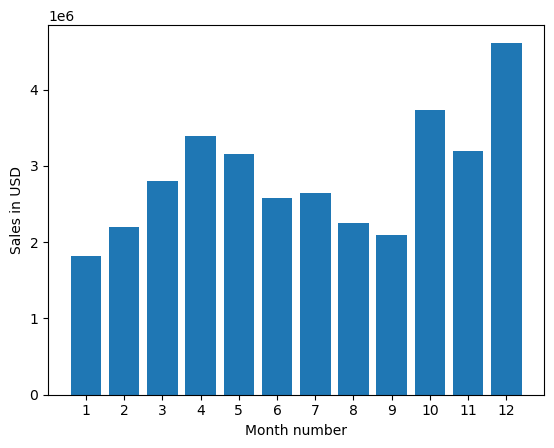

In [32]:
import matplotlib.pyplot as plt

months = range(1,13)
#x tengelyen a hónapok, y tengelyen a Sales oszlopai a results dataframe-nek
plt.bar(months, results['Sales'])
plt.xticks(months) #értékek x tengelyen
plt.ylabel('Sales in USD') #tengelyfeliratok
plt.xlabel('Month number')
plt.show()

### Mely városban voltak a legnagyobbak az eladási értékek?

In [41]:
#Ehhez szükségünk lesz egy City oszlopra, hogy tudjunk az alapján csoportosítani
#Puchase address oszlopból tudjuk kinyerni, az első vessző után való szóval!
#.apply() -> függvényeket tudunk lefuttatni a dataframe-en vele!
#lambda függvényt is tudunk ennek a delegate-nek passzolni!

def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
#Azért az 1-es érték kell, mivel ' '-re való split-elés esetén balról egy '' lesz a 0. elem!
#get_city is hívható, lambda helyett

#all_sales['City'] = all_sales['Purchase Address'].apply(lambda x: x.split(',')[1])

#all_sales['City'] = all_sales['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

#Megoldható f-string-ként is (format)
all_sales['City'] = all_sales['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

#Ha esetlegesen maradna benne fejléces rekord, biztonsági törlés:
#all_sales = all_sales.drop(columns='Column')

all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


C:\Users\gamer\AppData\Local\Temp\ipykernel_14288\2825563852.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_sales.groupby('City').sum()


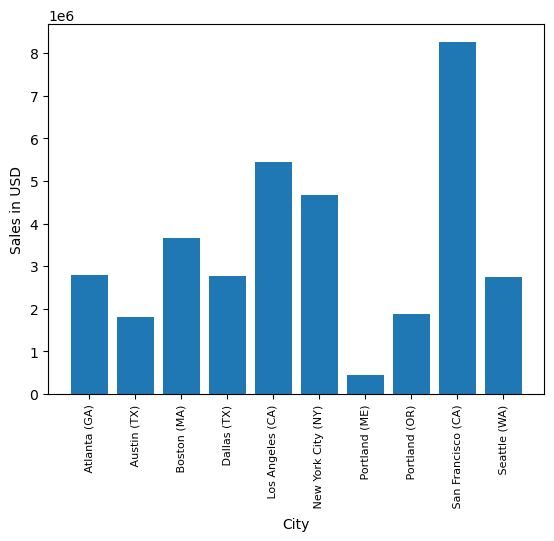

In [45]:
results = all_sales.groupby('City').sum()

#cities = all_sales['City'].unique() #SELECT DISTINCT df.City...
#A rendezés megoldása:
cities = [city for city, df in all_sales.groupby('City')]
#Keresztezéssel opldjuk meg!
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.show()

#Ordering nem lesz megfelelő, mivel a unique és a results['Sales'] Nem ugyan abban a sorrendben van!!



### Milyen időkben kell a hirdetéseket megjeleníteni ahhoz, hogy a lehető legmagasabb arányban vásároljon a felhasználó?

In [46]:
#A megoldáshoz az Order Date-et kell használnunk! 24 órában tudjuk őket felosztani
#Az Order Date-et DateTime példányokká alakítjuk a DateTime könyvtár használatával

all_sales['Order Date'] = pd.to_datetime(all_sales['Order Date'])
#Lehetséges, hogy a datetime érték mérete nagyobb lesz, mint a tárolt string!

In [47]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [49]:
all_sales['Hour'] = all_sales['Order Date'].dt.hour
#. date.hour -> property a datetime óra komponenséhez
all_sales['Minute'] = all_sales['Order Date'].dt.minute
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


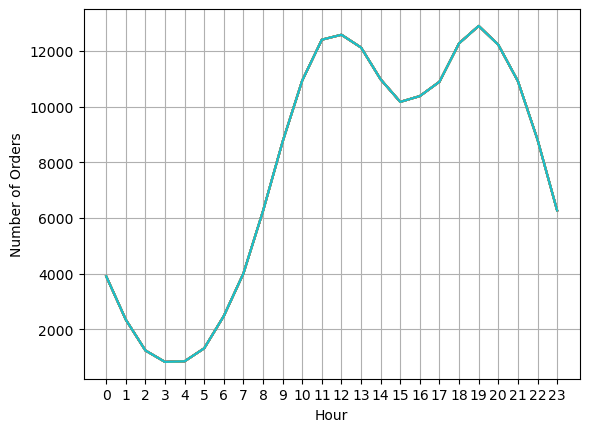

In [53]:
hours = [hour for hour, df in all_sales.groupby('Hour')] #Keys

plt.plot(hours, all_sales.groupby(['Hour']).count()) #megszámlálni kell az adott órában leadott rendeléseket!
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid() #olvashatóság érdekében
plt.show()

In [ ]:
#Válasz: 11 előtt akár, vagy valamelyik max-ponthoz közeli érték előtt!

#### Mely termékek vannak a leggyakrabban együtt eladva?

In [56]:
#Ha az order ID-k megegyeznek, akkor a rajta lévő termékek együtt lettek vásárolva
duplicate_ID_df = all_sales[all_sales['Order ID'].duplicated(keep=False)]
#Csak a duplikált ID-kkel rendelkező rekordokat tartjuk meg!
#keep=False -> first, last vagy False, False esetén megtartja mindet!
duplicate_ID_df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7


In [58]:
#Összetett attribútumokat csinálunk az egyező ID-k alapján:
duplicate_ID_df['Grouped'] = duplicate_ID_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
#.join() összekapcsolja az adott kifejezéseket!
#Ez ugyanakkor duplikálja az összetett értékeket!

duplicate_ID_df = duplicate_ID_df[['Order ID', 'Grouped']].drop_duplicates()

duplicate_ID_df.head()

C:\Users\gamer\AppData\Local\Temp\ipykernel_14288\4202408824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_ID_df['Grouped'] = duplicate_ID_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [60]:
#Az egyező párok számolása
#Egy listája van az együtt vett termékeknek, ezzel dolgozok

from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicate_ID_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) #csak a párokat, azért 2!

count.most_common(10) #most_common object-et ad vissza!

for key, value in count.most_common(10):
    print(key, value)

#A leggyakrabb pár: IPhone és Lightning Charging Cable

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Mely termék lett a legtöbbet eladva?

C:\Users\gamer\AppData\Local\Temp\ipykernel_14288\3384156972.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


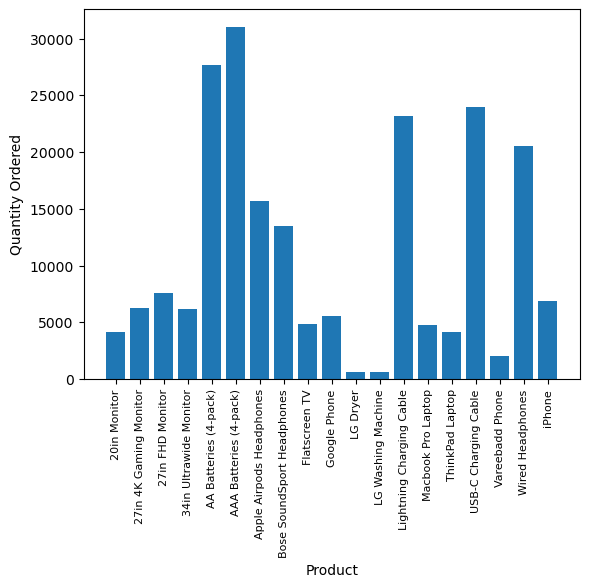

In [67]:
product_group = all_sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

AAA és AA elem volt a legtöbbször eladott termék, valószínűleg az áraik miatt, illetve ennek bizonyításához eladások mellé ábrázoljuk az árakat is:

In [69]:
prices = all_sales.groupby('Product').mean()['Price Each']

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\gamer\AppData\Local\Temp\ipykernel_14288\1123448929.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_sales.groupby('Product').mean()['Price Each']


Másik tengely ábrázolásához subplot-ot kell alkalmaznunk, az alábbi sorok vezetnek a megoldáshoz:

C:\Users\gamer\AppData\Local\Temp\ipykernel_14288\3521690130.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


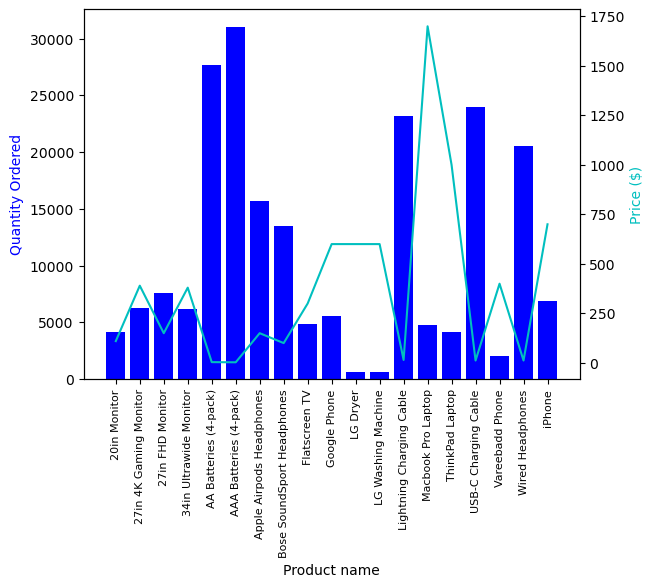

In [78]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='b')
ax2.plot(products, prices, 'c')

ax1.set_xlabel('Product name')
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='c')

plt.show()